In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

file_path = r"C:\Users\kimge\OneDrive\문서\Desktop\김 건\가천대학교\2025년 4학년 1학기_시간표\인공지능개론\5_week\kc_house\kc_house_data.csv"
df = pd.read_csv(file_path)

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df['price'].value_counts()

price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: count, Length: 4028, dtype: int64

In [14]:
print(df.isnull().sum()) # 결측지 확인 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [16]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date']) # date의 데이터 형 변환

In [8]:
df['date'].dtypes

dtype('<M8[ns]')

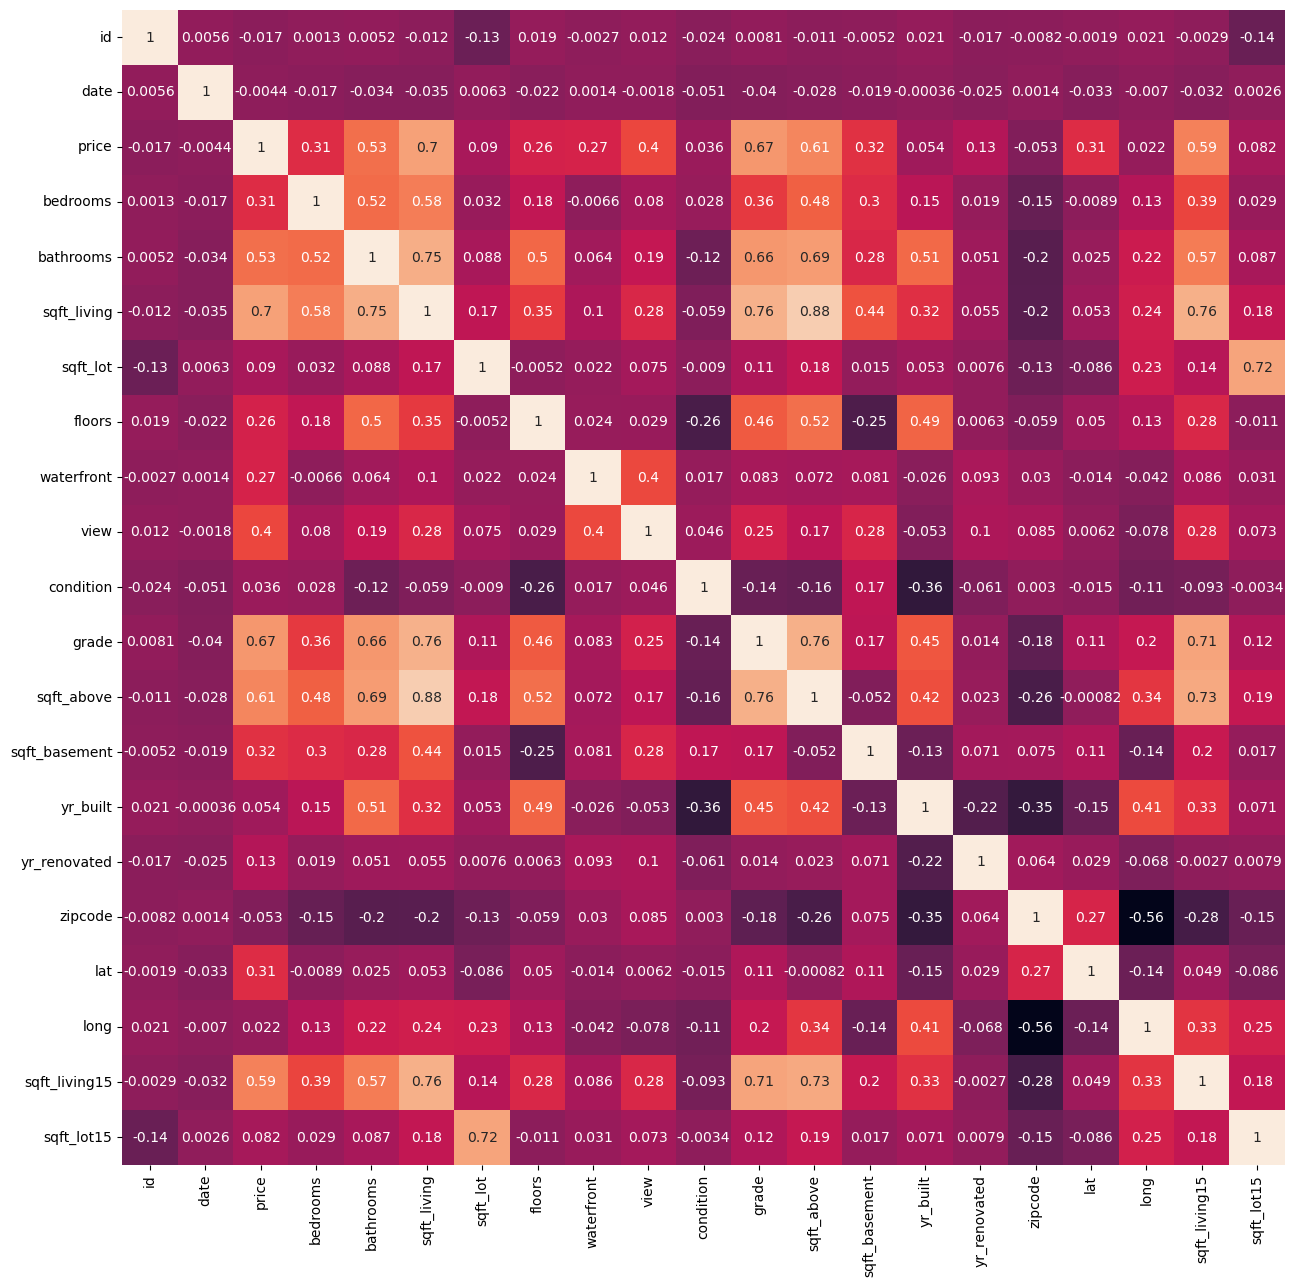

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr() # 각 컬럼 별 상관계수를 나타냄 (-1 ~ 1사이로)
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, cbar = False)
plt.show()

C:\Users\kimge\AppData\Local\Temp\ipykernel_9568\3890299300.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax) # 모든 컬럼을 대상으로 히스토그램을 생성


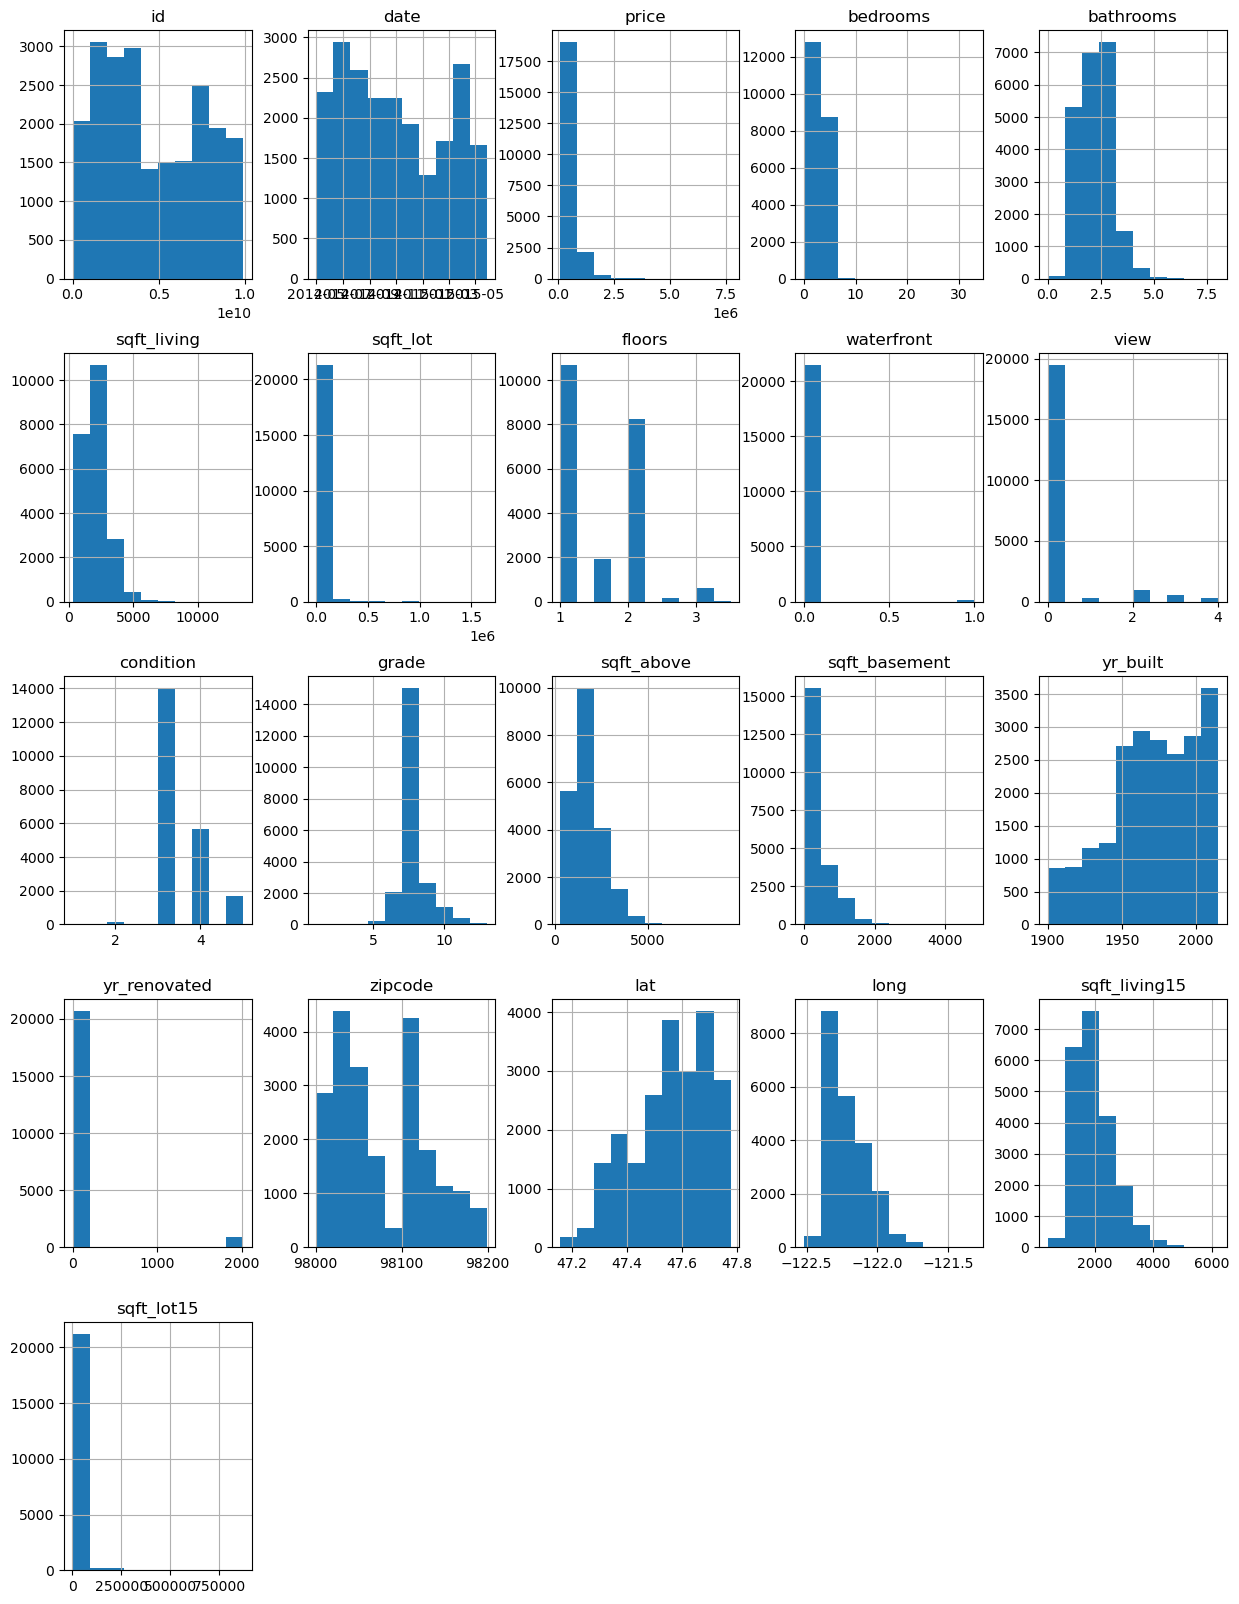

In [24]:
fig = plt.figure(figsize = (15,20)) 
ax = fig.gca() # 현재 활성화되어 있는 축을 가져옴
df.hist(ax = ax) # 모든 컬럼을 대상으로 히스토그램을 생성 
plt.show()

In [10]:
df_sampled = df.sample(frac=0.3, random_state=42) # 데이터가 너무 많아 샘플링을 통해 데이터 일부를 추출
X = df_sampled[['bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'grade','sqft_above', 'sqft_basement','lat','sqft_living15']]
#price와 상관 관계가 0.2 이상인 변수만 X로 설정
y = df_sampled['price']
print(X.shape)
print(y.shape)

(6484, 11)
(6484,)


In [12]:
type(X)

pandas.core.frame.DataFrame

In [14]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [16]:
X = X.values
Y = pd.get_dummies(y).values
print(X.shape)
print(Y.shape)

(6484, 11)
(6484, 1960)


In [18]:
X

array([[4.00000e+00, 2.25000e+00, 2.07000e+03, ..., 0.00000e+00,
        4.74388e+01, 2.39000e+03],
       [5.00000e+00, 3.00000e+00, 2.90000e+03, ..., 1.07000e+03,
        4.76784e+01, 2.37000e+03],
       [4.00000e+00, 2.50000e+00, 3.77000e+03, ..., 0.00000e+00,
        4.75646e+01, 3.71000e+03],
       ...,
       [3.00000e+00, 1.00000e+00, 1.15000e+03, ..., 0.00000e+00,
        4.77270e+01, 1.21000e+03],
       [3.00000e+00, 1.50000e+00, 2.14000e+03, ..., 2.40000e+02,
        4.76337e+01, 2.02000e+03],
       [4.00000e+00, 2.25000e+00, 2.51000e+03, ..., 6.70000e+02,
        4.77345e+01, 2.07000e+03]])

In [20]:
Y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5187, 11)
(1297, 11)
(5187, 1960)
(1297, 1960)


In [24]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD,Adam 

model = Sequential() # 모델 생성
model.add(Input(shape=(11,)))  # Input() 레이어로 명확하게 입력 정의
model.add(Dense(3000,activation='relu'))
model.add(Dense(5000,activation='relu'))
model.add(Dense(7000,activation='relu'))
model.add(Dense(4000,activation='relu'))
model.add(Dense(1960, activation='linear')) 
model.compile(optimizer='adam', loss='mse', metrics=['mse'])  
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3000)                │          36,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5000)                │      15,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7000)                │      35,007,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4000)                │      28,004,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1960)                │       7,841,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,893,960 (327.66 MB)

 Trainable params: 85,893,960 (327.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
print(type(X_train), X_train.dtype)
print(type(Y_train), Y_train.dtype)

<class 'numpy.ndarray'> float64
<class 'numpy.ndarray'> bool


In [28]:
model_history = model.fit(X_train, Y_train, epochs=30, batch_size=64,validation_split = 0.1) 
Y_pred = model.predict(X_test) 
Y_test_class = np.argmax(Y_test,axis=1) 
Y_pred_class = np.argmax(Y_pred,axis=1)

Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 45s 553ms/step - loss: 4234.2896 - mse: 4234.2896 - val_loss: 5.4529e-04 - val_mse: 5.4529e-04
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 538ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 5.2271e-04 - val_mse: 5.2271e-04
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 542ms/step - loss: 5.2249e-04 - mse: 5.2249e-04 - val_loss: 5.2254e-04 - val_mse: 5.2254e-04
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - loss: 5.2224e-04 - mse: 5.2224e-04 - val_loss: 5.2235e-04 - val_mse: 5.2235e-04
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 540ms/step - loss: 5.2213e-04 - mse: 5.2213e-04 - val_loss: 5.2213e-04 - val_mse: 5.2213e-04
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 540ms/step - loss: 5.2194e-04 - mse: 5.2194e-04 - val_loss: 5.2189e-04 - val_mse: 5.2189e-04
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 546ms/step - loss: 5.2167e-04 - mse: 5.2167e-04 - val_loss: 5.2164e-04 - val_mse: 5.2164e-04
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 539ms/step - loss: 5.21

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(f"MSE (평균 제곱 오차): {mse:.4f}")
print(f"MAE (평균 절대 오차): {mae:.4f}")
print(f"RMSE (제곱근 평균 제곱 오차): {rmse:.4f}")
print(f"R² Score (결정 계수): {r2:.4f}")

MSE (평균 제곱 오차): 0.0005
MAE (평균 절대 오차): 0.0026
RMSE (제곱근 평균 제곱 오차): 0.0227
R² Score (결정 계수): -0.0023


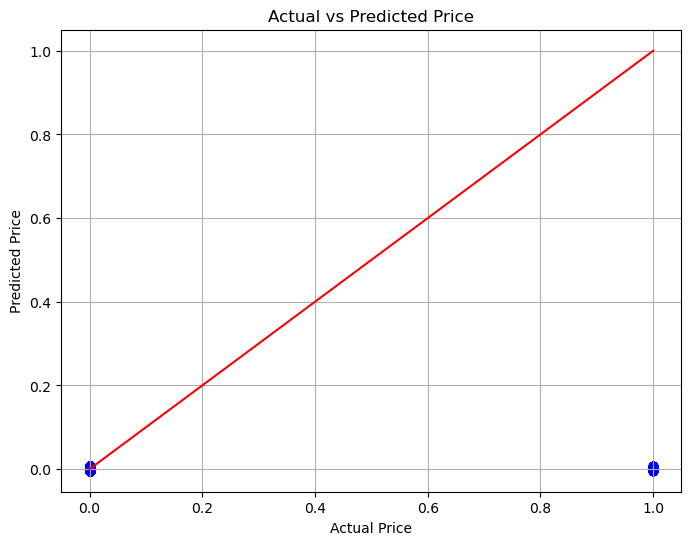

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='b')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r')  # y=x 선
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

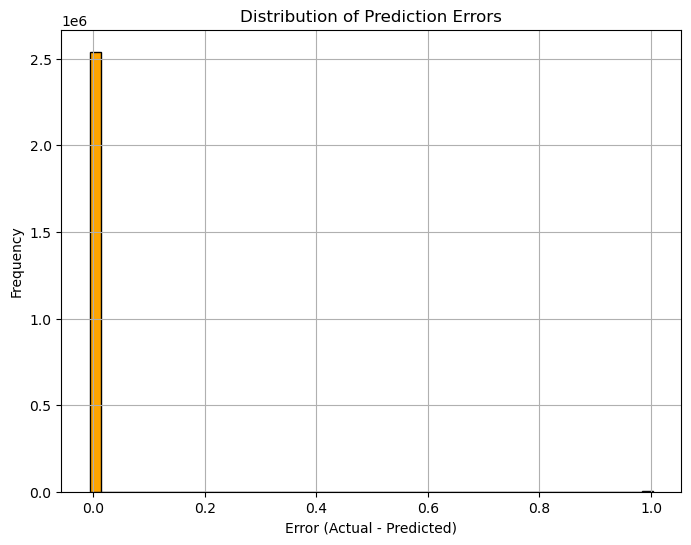

In [38]:
errors = (Y_test - Y_pred).flatten()  # 1차원으로 변환
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()